In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from scipy.stats import norm 
import time 

Soit la valeur du portefeuille portant sur un seul actif sous jacent, dont le spot sera noté $V$. Nous adopterons les notations suivantes :

- $K$, le **strike** de l'option.
- $\sigma$, la **volatilité**.
- $T$, la **maturité** de l'option.
- $r$, le **taux d'intérêt**.
- $q$, le **taux de dividende** de l'actif sous-jacent, versé à rythme continu.


In [2]:
K = 100
T = 1
r = 0.1 
q = 0 
sigmas = [0.1, 0.2, 0.3]

Le prix d'un call européen est donné par :

$$
C = S_0 e^{-qT} N(d_1) - K e^{-rT} N(d_2)
$$

où :

- $d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r - q + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}$
- $d_2 = d_1 - \sigma \sqrt{T}$

Le prix d'un put européen est donné par :

$$
P = K e^{-rT} N(-d_2) - S_0 e^{-qT} N(-d_1)
$$

où :

- $d_1 = \frac{\ln\left(\frac{S_0}{K}\right) + \left(r - q + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}$
- $d_2 = d_1 - \sigma \sqrt{T}$

$$
\mathcal{N}(x) := \mathbb{P}(X \leq x) \quad \text{où} \quad X \sim \mathcal{N}(0,1), \quad x \in \mathbb{R}.
$$


In [3]:
def d_1(t, S, K, T, sigma, r, q) : 
    return (np.log(S/K)+(r-q+sigma**2/2)*(T-t))/(sigma*np.sqrt(T-t))

def d_2(t, S, K, T, sigma, r, q) : 
    return d_1(t, S, K, T, sigma, r, q)-sigma*np.sqrt(T-t)

def call(t, S, K, T, sigma, r, q) : 
    return S*np.exp(-q*(T-t))*norm.cdf(d_1(t, S, K, T, sigma, r, q))-K*np.exp(-r*(T-t))*norm.cdf(d_2(t, S, K, T, sigma, r, q))

def put(t, S, K, T, sigma, r, q) : 
    return -S*np.exp(-q*(T-t))*norm.cdf(-d_1(t, S, K, T, sigma, r, q))+K*np.exp(-r*(T-t))*norm.cdf(-d_2(t, S, K, T, sigma, r, q))



Le $\Delta$ d'un portefeuille correspond à la dérivée partielle de la valeur du portefeuille $V$ par rapport au prix $S$ du sous-jacent :

$$
\Delta(V) = \frac{\partial V}{\partial S}
$$

On sait que :

$$
C_t = S_t e^{-q(T-t)} \mathcal{N}(d_1) - K e^{-r(T-t)} \mathcal{N}(d_2), \quad \text{pour tout} \quad t \in [0, T].
$$

Alors en appliquant la règle de chaîne :

$$
\Delta(C_t) = \frac{\partial C_t}{\partial S} = e^{-q(T-t)} \mathcal{N}(d_1) + S e^{-q(T-t)} \frac{\partial \mathcal{N}(d_1)}{\partial S} - K e^{-r(T-t)} \frac{\partial \mathcal{N}(d_2)}{\partial S}
$$

$$
\iff \Delta(C_t) = e^{-q(T-t)} \mathcal{N}(d_1) + S e^{-q(T-t)} \mathcal{N}'(d_1) \frac{\partial d_1}{\partial S} - K e^{-r(T-t)} \mathcal{N}'(d_2) \frac{\partial d_2}{\partial S}
$$

$$
\iff \Delta(C_t) = e^{-q(T-t)} \mathcal{N}(d_1) + S e^{-q(T-t)} \mathcal{N}'(d_1) \left( \frac{\partial d_1}{\partial S} - \frac{\partial d_2}{\partial S} \right)
$$

Sachant que $d_2 = d_1 - \sigma \sqrt{T - t}$, il vient que $\frac{\partial d_1}{\partial S} = \frac{\partial d_2}{\partial S}$. 

Au final :

$$
\Delta(C_t) = e^{-q(T-t)} \mathcal{N}(d_1).
$$

Par la relation de parité call/put :

$$
P_t + S_t e^{-q(T-t)} - C_t = K e^{-r(T-t)}.
$$

Ainsi :

$$
\Delta(P_t) = \Delta(C_t) - e^{-q(T-t)}
$$

$$
\iff \Delta(P_t) = e^{-q(T-t)} \left( \mathcal{N}(d_1) - 1 \right)
$$

Comme $1 - \mathcal{N}(d_1) = \mathcal{N}(-d_1)$, on a finalement :

$$
\Delta(P_t) = -e^{-q(T-t)} \mathcal{N}(-d_1).
$$


In [4]:
def delta_call(t, S, K, T, sigma, r, q) : 
    return np.exp(-q*(T-t))*norm.cdf(d_1(t, S, K, T, sigma, r, q))

print("Le delta du call",delta_call(0,120,K, T, sigmas[0], r, q))

def delta_put(t, S, K, T, sigma, r, q) : 
    return -np.exp(-q*(T-t))*norm.cdf(-d_1(t, S, K, T, sigma, r, q))

print("Le delta du put",delta_put(0,120,K, T, sigmas[0], r, q))

Le delta du call 0.9979684161689658
Le delta du put -0.0020315838310341764


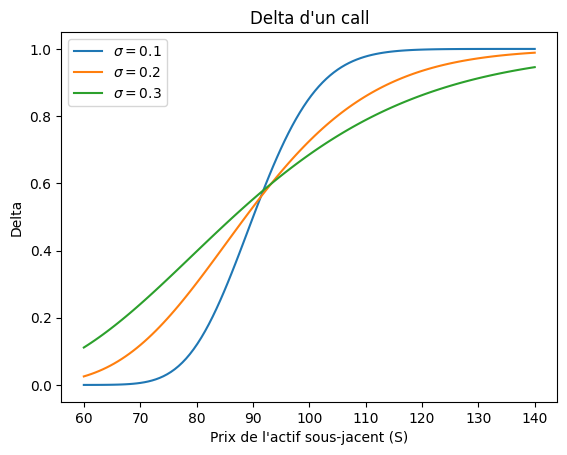

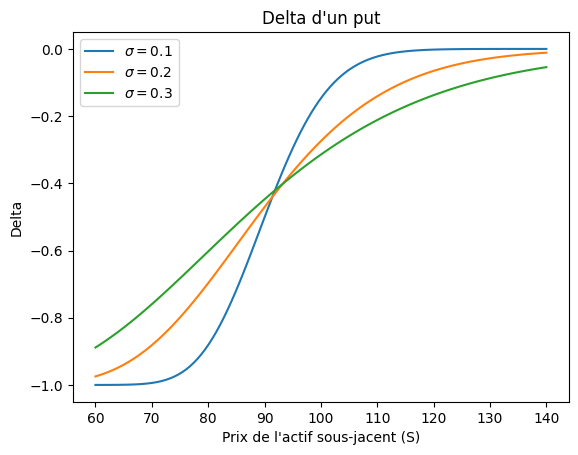

In [5]:
delta_values = []
S_values = np.linspace(60,140,120)

for sigma in sigmas:
    delta_sigma = [delta_call(0, S, K, T, sigma, r, q) for S in S_values]
    delta_values.append(delta_sigma)

for i, sigma in enumerate(sigmas):
    plt.plot(S_values, delta_values[i], label=fr"$\sigma = {sigma}$")

plt.title(fr"Delta d'un call")
plt.xlabel('Prix de l\'actif sous-jacent (S)')
plt.ylabel('Delta')
plt.legend(); 


delta_values = []
S_values = np.linspace(60,140,120)

plt.figure()
for sigma in sigmas:
    delta_sigma = [delta_put(0, S, K, T, sigma, r, q) for S in S_values]
    delta_values.append(delta_sigma)

for i, sigma in enumerate(sigmas):
    plt.plot(S_values, delta_values[i], label=fr"$\sigma = {sigma}$")

plt.title("Delta d'un put")
plt.xlabel('Prix de l\'actif sous-jacent (S)')
plt.ylabel('Delta')
plt.legend(); 

Pour un **call** :

- $\Delta = 0.5$ signifie que $S = K$, autrement dit le call est **ATM** (*at the money*).
- $\Delta < 0.5$, i.e. $S < K$, le call est **OTM** (*out of the money*). Si $\Delta \approx 0$, le call est **DOTM** (*deep out of the money*), et dans ce cas son prix sera très faible.
- $\Delta > 0.5$, i.e. $S > K$, le call est **ITM** (*in the money*). Si $\Delta \approx 1$, le call est **DITM** (*deep in the money*), et dans ce cas son prix sera très élevé.

Ainsi, plus $\Delta$ est proche de 1, plus l'option sera chère.

Pour un **put** :

- $\Delta = -0.5$ signifie que $S = K$, autrement dit le put est **ATM** (*at the money*).
- $\Delta < -0.5$, i.e. $S < K$, le put est **ITM** (*in the money*). Si $\Delta \approx -1$, le put est **DITM** (*deep in the money*), et dans ce cas son prix sera très élevé.
- $\Delta > -0.5$, i.e. $S > K$, le put est **OTM** (*out of the money*). Si $\Delta \approx 0$, le put est **DOTM** (*deep out of the money*), et dans ce cas son prix sera très faible.

Ainsi, plus $\Delta$ est proche de $-1$, plus l'option sera chère.



### Le Gamma ($\Gamma$)

Le $\Gamma$ représente la convexité d'une option en fonction du cours du sous-jacent. Il indique si le prix de l'option a tendance à évoluer plus ou moins vite que le prix du sous-jacent. Par analogie avec la physique, on peut considérer $\Delta$ comme la vitesse (dérivée 1ère), et $\Gamma$ comme l'accélération (dérivée seconde) :

$$
\Gamma(V) = \frac{\partial^2 V}{\partial S^2}
$$

Une autre interprétation du Gamma est le sens de l'évolution du Delta en fonction du prix du sous-jacent :

- $\Gamma \geq 0$ indique que $S$ et $\Delta$ évoluent dans le même sens.
- $\Gamma \leq 0$ indique le contraire.


### Calcul pour un call / put.

Nous avons précédemment montré que :

$$
\Delta(C_t) = e^{-q(T-t)} \mathcal{N}(d_1).
$$

Alors,

$$
\Gamma(C_t) = \frac{\partial^2 C_t}{\partial S^2} = \frac{\partial \Delta(C_t)}{\partial S} = e^{-q(T-t)} \mathcal{N}'(d_1) \frac{\partial d_1}{\partial S}.
$$

En notant que $\frac{\partial d_1}{\partial S} = \frac{1}{S\sigma\sqrt{T-t}}$, nous obtenons :

$$
\Gamma(C_t) = \frac{e^{-q(T-t)}}{S\sigma\sqrt{T-t}} \frac{1}{\sqrt{2\pi}} e^{-\frac{d_1^2}{2}}.
$$

De même, la relation de parité call / put dérivée deux fois par rapport à $S$ implique :

$$
\Gamma(P_t) = \Gamma(C_t) = \frac{e^{-q(T-t)}}{S\sigma\sqrt{T-t}} \frac{1}{\sqrt{2\pi}} e^{-\frac{d_1^2}{2}}.
$$


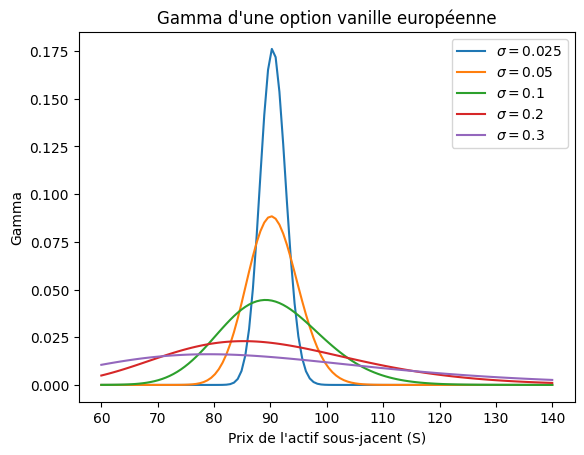

In [6]:
def gamma(t, S, K, T, sigma, r, q) : 
    return np.exp(-q*(T-t))/(S*sigma*np.sqrt(T-t))*1/(np.sqrt(2*np.pi))*np.exp(-d_1(t, S, K, T, sigma, r, q)**2/2)

sigmas = [0.025,0.05,0.1, 0.2, 0.3]
K = 100
T = 1 
r = 0.1 
q = 0

gamma_values = []
S_values = np.linspace(60,140,120)

for sigma in sigmas:
    gamma_sigma = [gamma(0, S, K, T, sigma, r, q) for S in S_values]
    gamma_values.append(gamma_sigma)

for i, sigma in enumerate(sigmas):
    plt.plot(S_values, gamma_values[i], label=fr"$\sigma = {sigma}$")

plt.title(fr"Gamma d'une option vanille européenne")
plt.xlabel('Prix de l\'actif sous-jacent (S)')
plt.ylabel('Gamma')
plt.legend(); 

### Le Thêta ($\Theta$)

Le $\Theta$ est le coût (ou le gain) du temps qui passe sur le portefeuille $V$. Ce dernier permet d'évaluer combien le passage du temps influe sur la valeur d'une option. Pour l'instant, définissons-le ainsi :

$$
\Theta(V) = \frac{\partial V}{\partial t}
$$

L'inconvénient de cette définition est qu'elle pose problème lors du calcul avec $t = 0$. En effet, on obtiendrait $\Theta(V) = 0$, puisque cette quantité ne dépend pas de $t$ (puisqu'il est pris au temps 0). Nous pouvons ainsi le voir comme :

$$
\Theta(V) = \frac{\partial V}{\partial t} \Bigg|_{t=0}
$$

L'interprétation correcte pour $\Theta$ est le taux de variation de la valeur de l'option par rapport au temps restant jusqu'à l'échéance $T - t$. En appliquant la règle de chaîne :

$$
\Theta(V) = \frac{\partial V}{\partial (T - t)} \cdot \frac{\partial (T - t)}{\partial t} = - \frac{\partial V}{\partial (T - t)}.
$$

Enfin, une dernière façon de définir $\Theta$ est la suivante :

$$
\Theta(V) = -\frac{\partial V}{\partial T}.
$$

###  Calcul pour un call / put.

On sait que $C_t = S_t e^{-q(T-t)} \mathcal{N}(d_1) - K e^{-r(T-t)} \mathcal{N}(d_2)$.

$$
\frac{\partial C_t}{\partial (T - t)} = -q S_t e^{-q(T-t)} \mathcal{N}(d_1) + S_t e^{-q(T-t)} \mathcal{N}'(d_1) \frac{\partial d_1}{\partial (T - t)} + r K e^{-r(T-t)} \mathcal{N}(d_2) - K e^{-r(T-t)} \mathcal{N}'(d_2) \frac{\partial d_2}{\partial (T - t)}.
$$

En notant que $d_1 - d_2 = \sigma \sqrt{T - t}$, il vient que :

$$
\frac{\partial d_1}{\partial (T - t)} - \frac{\partial d_2}{\partial (T - t)} = \frac{\sigma}{2 \sqrt{T - t}}.
$$

Donc :

$$
\frac{\partial C_t}{\partial (T - t)} = -q S_t e^{-q(T-t)} \mathcal{N}(d_1) + S_t e^{-q(T-t)} \mathcal{N}'(d_1) \frac{\sigma}{2\sqrt{T-t}} - r K e^{-r(T-t)} \mathcal{N}(d_2).
$$

Finalement, $\Theta(C_t)$ est :

$$
\Theta(C_t) = \frac{\partial C_t}{\partial (T - t)} = q S_t e^{-q(T-t)} \mathcal{N}(d_1) - \frac{1}{\sqrt{2\pi}} S_t e^{-q(T-t)} \frac{\sigma}{2\sqrt{T - t}} e^{-\frac{d_1^2}{2}} - r K e^{-r(T-t)} \mathcal{N}(d_2).
$$

En utilisant la parité call / put :

$$
P_t + S_t e^{-q(T-t)} - C_t = K e^{-r(T-t)},
$$

$$
\Theta(P_t) = \Theta(C_t) + r K e^{-r(T-t)} - q S_t e^{-q(T-t)}.
$$

Comme $1 - \mathcal{N}(d_1) = \mathcal{N}(-d_1)$, il vient que :

$$
\Theta(P_t) = -q S_t e^{-q(T-t)} \mathcal{N}(-d_1) - \frac{1}{\sqrt{2\pi}} S_t e^{-q(T-t)} \frac{\sigma}{2\sqrt{T - t}} e^{-\frac{d_1^2}{2}} + r K e^{-r(T-t)} \mathcal{N}(-d_2).
$$


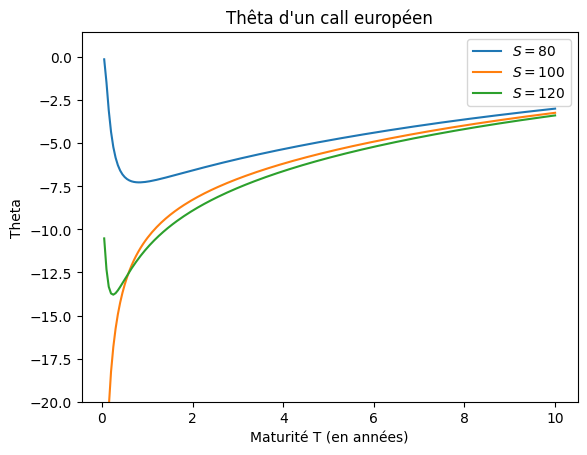

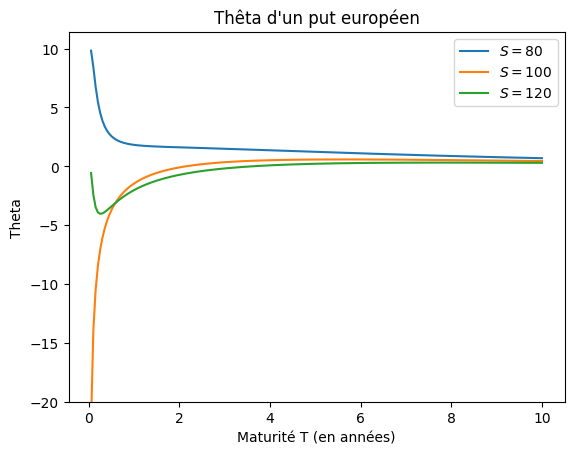

In [7]:
S_values = [80,100,120]

def theta_call(t, S, K, T, sigma, r, q) : 
    if T == t:
        T = t + 1e-6
    else : 
        return q*S*np.exp(-q*(T-t))*norm.cdf(d_1(t, S, K, T, sigma, r, q))-1/(np.sqrt(2*np.pi))*S*np.exp(-q*(T-t))*sigma/(2*np.sqrt(T-t))*np.exp(-d_1(t, S, K, T, sigma, r, q)**2/2)-r*K*np.exp(-r*(T-t))*norm.cdf(d_2(t, S, K, T, sigma, r, q))

def theta_put(t, S, K, T, sigma, r, q) : 
    if T == t:
        T = t + 1e-6 
    else : 
        return -q*S*np.exp(-q*(T-t))*norm.cdf(-d_1(t, S, K, T, sigma, r, q))-1/(np.sqrt(2*np.pi))*S*np.exp(-q*(T-t))*sigma/(2*np.sqrt(T-t))*np.exp(-d_1(t, S, K, T, sigma, r, q)**2/2)+r*K*np.exp(-r*(T-t))*norm.cdf(-d_2(t, S, K, T, sigma, r, q))

thetas_values = []
T_values = np.linspace(0,10,200)

for S in S_values:
    t = [theta_call(0, S, K, T, sigma, r, q) for T in T_values]
    thetas_values.append(t)

for i, s in enumerate(S_values):
    plt.plot(T_values, thetas_values[i], label=fr"$S = {s}$")

plt.title(fr"Thêta d'un call européen")
plt.xlabel('Maturité T (en années)')
plt.ylim(-20)
plt.ylabel('Theta')
plt.legend(); 

plt.figure()
thetas_values = []
T_values = np.linspace(0,10,200)


for S in S_values:
    t = [theta_put(0, S, K, T, sigma, r, q) for T in T_values]
    thetas_values.append(t)

for i, s in enumerate(S_values):
    plt.plot(T_values, thetas_values[i], label=fr"$S = {s}$")

plt.title(fr"Thêta d'un put européen")
plt.xlabel('Maturité T (en années)')
plt.ylim(-20)
plt.ylabel('Theta')
plt.legend(); 


### Le Rhô ($\rho$)

Le $\rho$ est le taux de variation de la valeur du portefeuille $V$ en fonction du taux sans risque $r$. Il est défini comme :

$$
\rho(V) = \frac{\partial V}{\partial r}
$$

### Calcul pour un call / put.

On sait que $C_t = S_t e^{-q(T-t)} \mathcal{N}(d_1) - K e^{-r(T-t)} \mathcal{N}(d_2)$.

Ainsi :

$$
\rho(C_t) = \frac{\partial C_t}{\partial r} = S_t e^{-q(T-t)} \mathcal{N}'(d_1) \frac{\partial d_1}{\partial r} + K(T-t) e^{-r(T-t)} \mathcal{N}(d_2).
$$

Finalement, comme la différence $d_1 - d_2$ ne dépend pas du taux sans risque :

$$
\rho(C_t) = K(T - t) e^{-r(T - t)} \mathcal{N}(d_2).
$$

Toujours par la relation de parité call / put :

$$
\rho(P_t) = \rho(C_t) - (T - t) K e^{-r(T - t)} = - K(T - t) e^{-r(T - t)} \mathcal{N}(-d_2),
$$

par le fait que $1 - \mathcal{N}(d_2) = \mathcal{N}(-d_2)$.


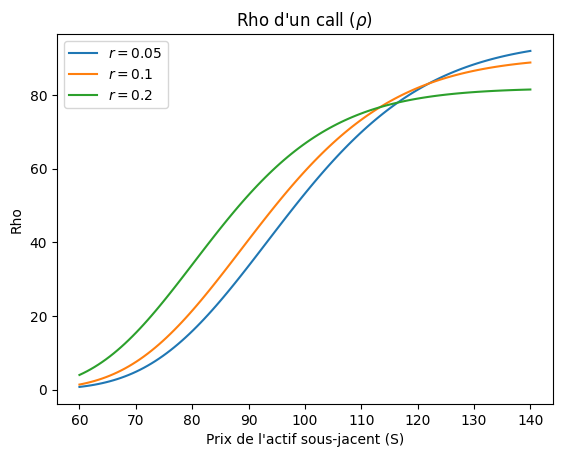

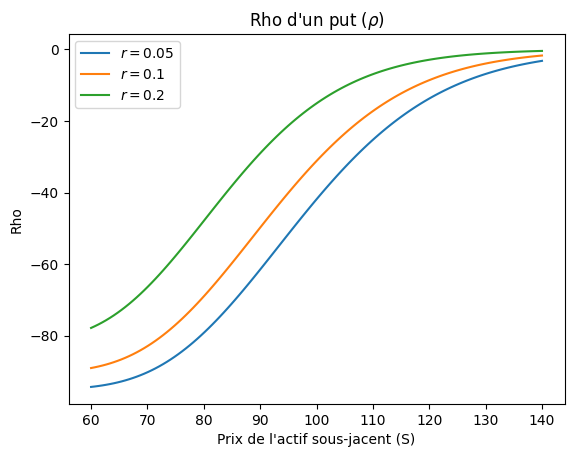

In [8]:
def rho_call(t, S, K, T, sigma, r, q) : 
    return K*(T-t)*np.exp(-r*(T-t))*norm.cdf(d_2(t, S, K, T, sigma, r, q))

rho_call(0,100,100,1,0.3,0.05, 0)

def rho_put(t, S, K, T, sigma, r, q) : 
    return -K*(T-t)*np.exp(-r*(T-t))*norm.cdf(-d_2(t, S, K, T, sigma, r, q))

T = 1
sigma = 0.2
q = 0

r_values = [0.05, 0.1, 0.2]
rho_values = []

S_values = np.linspace(60,140,120)

for r in r_values:
    rho = [rho_call(0, S, K, T, sigma, r, q) for S in S_values]
    rho_values.append(rho)

for i, r in enumerate(r_values):
    plt.plot(S_values, rho_values[i], label=fr"$r = {r}$")

plt.title(fr"Rho d'un call ($\rho$)")
plt.xlabel('Prix de l\'actif sous-jacent (S)')
plt.ylabel('Rho')
plt.legend(); 

plt.figure()
r_values = [0.05, 0.1, 0.2]
rho_values = []

S_values = np.linspace(60,140,120)

for r in r_values:
    rho = [rho_put(0, S, K, T, sigma, r, q) for S in S_values]
    rho_values.append(rho)

for i, r in enumerate(r_values):
    plt.plot(S_values, rho_values[i], label=fr"$r = {r}$")

plt.title(fr"Rho d'un put ($\rho$)")
plt.xlabel('Prix de l\'actif sous-jacent (S)')
plt.ylabel('Rho')
plt.legend(); 

### Le Véga ($\text{Vega}$).

Le **véga** (on peut le trouver avec la notation $\nu$) mesure la sensibilité à la volatilité. Il s'exprime comme :

$$
\text{vega}(V) = \frac{\partial V}{\partial \sigma}
$$

### Calcul pour un call / put.

On sait que $C_t = S_t e^{-q(T-t)} \mathcal{N}(d_1) - K e^{-r(T-t)} \mathcal{N}(d_2)$.

Ainsi :

$$
\text{vega}(C_t) = S_t e^{-q(T-t)} \mathcal{N}'(d_1) \frac{\partial d_1}{\partial \sigma} - K e^{-r(T-t)} \mathcal{N}'(d_2) \frac{\partial d_2}{\partial \sigma}.
$$

$$
\iff \text{vega}(C_t) = S_t e^{-q(T-t)} \mathcal{N}'(d_1) \left( \frac{\partial d_1}{\partial \sigma} - \frac{\partial d_2}{\partial \sigma} \right)
$$

$$
\iff \text{vega}(C_t) = \frac{1}{\sqrt{2\pi}} S_t e^{-q(T-t)} e^{-\frac{d_1^2}{2}} \sqrt{T - t}.
$$

La relation de parité call / put est la suivante : $P_t + S_t e^{-q(T-t)} - C_t = K e^{-r(T-t)}$, ce qui implique directement (en dérivant par rapport à $\sigma$ de chaque côté) que :

$$
\text{vega}(P_t) = \text{vega}(C_t).
$$


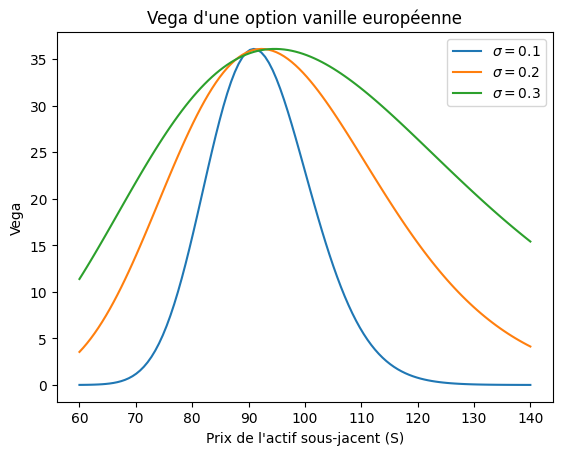

In [9]:
def vega(t, S, K, T, sigma, r, q) : 
    if(T == t) : # Afin d'éviter la division par 0. 
        T = t + 1e-6
    return 1/np.sqrt(2*np.pi)*S*np.exp(-q*(T-t))*np.exp(-d_1(t, S, K, T, sigma, r, q)**2/2)*np.sqrt(T-t)

S_values = [80,100, 120]
K = 100
T = 1
r = 0.1 
q = 0 
sigmas = [0.1,0.2,0.3]

vega_values = []
S_values = np.linspace(60,140,120)

for sigma in sigmas:
    v = [vega(0, S, K, T, sigma, r, q) for S in S_values]
    vega_values.append(v)

for i, sigma in enumerate(sigmas):
    plt.plot(S_values, vega_values[i], label=fr"$\sigma = {sigma}$")

plt.title(fr"Vega d'une option vanille européenne")
plt.xlabel('Prix de l\'actif sous-jacent (S)')
plt.ylabel('Vega')
plt.legend(); 



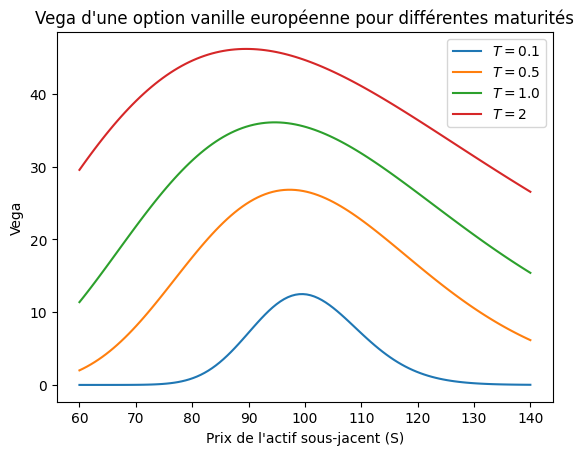

In [10]:
K = 100
sigma = 0.3
r = 0.1
q = 0
S_values = np.linspace(60,140,120)
T_values = [0.1, 0.5, 1.0,2]

vega_values = []
for T in T_values:
    vega_s = [vega(0, S, K, T, sigma, r, q) for S in S_values]
    vega_values.append(vega_s)

for i, T in enumerate(T_values):
    plt.plot(S_values, vega_values[i], label=fr"$T = {T}$")

plt.title("Vega d'une option vanille européenne pour différentes maturités")
plt.xlabel('Prix de l\'actif sous-jacent (S)')
plt.ylabel('Vega')
plt.legend();

On remarque que plus la maturité est lointaine, plus **vega** est élevé (contrairement au $\Theta$ et au $\Gamma$). Cela s'explique par le fait que si l'option expire dans peu de temps, la volatilité affectera moins le prix des options. C'est ce que nous allons démontrer.

Pour des raisons de clarté, nous prenons une option **ATM**, avec $r = q = 0$. Montrons que :

$$
\frac{\partial \text{vega}(V)}{\partial (T - t)} \geq 0.
$$

Dans ce cas particulier, $d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r - q + \frac{\sigma^2}{2}\right)(T - t)}{\sigma \sqrt{T - t}} = \frac{\sigma \sqrt{T - t}}{2}$, et

$$
\text{vega}(V) = S \sqrt{T - t} \frac{1}{\sqrt{2\pi}} e^{-\frac{d_1^2}{2}}.
$$

Par la règle de chaîne :

$$
\frac{\partial \text{vega}(V)}{\partial (T - t)} = S \frac{1}{2\sqrt{T - t}} \frac{1}{\sqrt{2\pi}} e^{-\frac{d_1^2}{2}} - S \sqrt{T - t} \frac{1}{\sqrt{2\pi}} d_1 e^{-\frac{d_1^2}{2}} \frac{\partial d_1}{\partial (T - t)}.
$$

$$
\iff \frac{\partial \text{vega}(V)}{\partial (T - t)} = S \frac{1}{2\sqrt{T - t}} \frac{1}{\sqrt{2\pi}} e^{-\frac{d_1^2}{2}} - S \frac{T - t}{\sigma} \frac{\sigma}{2} e^{-\frac{d_1^2}{2}}.
$$

En simplifiant, nous obtenons :

$$
\frac{\partial \text{vega}(V)}{\partial (T - t)} = S \frac{1}{2\sqrt{2\pi}} e^{-\frac{d_1^2}{2}} \left( \frac{1}{\sqrt{T - t}} - \frac{\sigma^2 \sqrt{T - t}}{8} \right).
$$

$$
\frac{\partial \text{vega}(V)}{\partial (T - t)} = \frac{S}{2\sqrt{2\pi(T - t)}} e^{-\frac{d_1^2}{2}} - \frac{\sigma^2 S \sqrt{T - t}}{8\sqrt{2\pi}} e^{-\frac{d_1^2}{2}}.
$$

$$
\iff \frac{\partial \text{vega}(V)}{\partial (T - t)} = \frac{S}{2\sqrt{2\pi(T - t)}} \left( 1 - \frac{\sigma^2 (T - t)}{4} \right) e^{-\frac{d_1^2}{2}}.
$$

Ainsi,

$$
\frac{\partial \text{vega}(V)}{\partial (T - t)} \geq 0
$$

$$
\iff 1 - \frac{\sigma^2 (T - t)}{4} \geq 0
$$

$$
\iff \frac{4}{\sigma^2} \geq T - t,
$$

qui est remplie pour des volatilities et des maturités raisonnables ($0.15 \leq \sigma \leq 0.5$), comme nous allons le voir dans l'exemple ci-dessous.


### Interprétation financière et lien avec les grecques.

Remarquons que l'EDP de Black-Scholes peut se réécrire en utilisant les grecques. Cela donne :

$$
\frac{\partial f}{\partial t} + \frac{1}{2} \sigma^2 S_t^2 \Gamma(f) + r S_t \Delta(f) - r f = 0
$$

$$
\iff \frac{\partial f}{\partial t} = r(f - S_t \Delta(f)) - \frac{\sigma^2 S_t^2}{2} \Gamma(f).
$$

L'approximation par différence finie du membre de gauche donne :

$$
\frac{f(S, t + dt) - f(S, t)}{dt} = r(f - S_t \Delta(f)) - \frac{\sigma^2 S_t^2}{2} \Gamma(f),
$$

$$
df = r(f - S_t \Delta(f))dt - \frac{\sigma^2 S_t^2}{2} \Gamma(f) dt.
$$

Une option vanille européenne de prix $f(S, t)$ peut être répliquée (car le marché est complet). Autrement dit, il existe un portefeuille autofinancé $V$ tel que $V(T) = f(S_T, T)$. Le portefeuille $\Pi$ introduit dans la partie précédente convient. Alors :

- Les intérêts $r(f - S_t \Delta(f))dt$ sont réalisés sur la position en cash du portefeuille de réplication.
- La réplication coûte $-\frac{\sigma^2 S_t^2}{2} \Gamma(f) dt$ (phénomène de slippage).

Afin de poursuivre la relation entre l'EDP et les Grecques, une dernière reformulation donne :

$$
\Theta(f) + \frac{1}{2} \sigma^2 S_t^2 \Gamma(f) + r S_t \Delta(f) - r f = 0
$$

$$
\iff \Theta(f) + \frac{1}{2} \sigma^2 S_t^2 \Gamma(f) = r(f - S_t \Delta(f)).
$$

Le membre de droite étant négligeable par rapport à celui de gauche, une approximation couramment utilisée est :

$$
1 + \frac{\sigma^2 S^2}{2} \frac{\Gamma}{\Theta} \approx 0.
$$


Quelques précisions concernant cette approximation :

On remarque que si celle-ci est vérifiée, alors $\Gamma$ et $\Theta$ sont de signes opposés. Pour les calls / puts européens, $\Delta$ est croissante, donc $\Gamma > 0$. Cela signifie — en général — que $\Theta < 0$ : à mesure que l'option se rapproche de l'échéance, sa valeur diminue.

Notons par exemple un cas où nous avons $\Gamma$, $\Theta > 0$ : le cas d'un put **DITM** (voir 3., cas où $S = 80$, $K = 100$).

#### Exemple :
Prenons une option d'achat de maturité 6 mois sur un actif ne payant pas de dividendes, où $S = 50$, $\sigma = 0.3$ et $r = 4\%$.

Prenons :

$$
\frac{S}{K} = \{1, 1.1, 1.2, 1.3, 1.5, 0.9, 0.8, 0.7, 0.5\}.
$$

Autrement dit, l'option est **ATM**, 10%, 20%, 30%, et 50% **ITM**, et 10%, 20%, 30%, et 50% **OTM** respectivement.


In [11]:
import pandas as pd 

S = 50 
T = 0.5
sigma = 0.3
r = 0.04
q = 0
quotient_values = [0.5, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.5]

data = []
for quotient in quotient_values:
    val = 1 + (sigma**2 * S**2 / 2) * gamma(0, S, S/quotient, T, sigma, r, q) / theta_call(0, S, S/quotient, T, sigma, r, q)
    data.append([quotient, val])

df = pd.DataFrame(data, columns=['S/K', "Valeur"])

print(df) 

   S/K    Valeur
0  0.5  0.050520
1  0.7  0.082234
2  0.8  0.106837
3  0.9  0.141157
4  1.0  0.189707
5  1.1  0.258178
6  1.2  0.351801
7  1.3  0.471053
8  1.5  0.736077


**Remarque** : L'approximation $1 + \frac{\sigma^2 S^2}{2} \frac{\Gamma}{\Theta} \approx 0$ est plus pertinente lorsque les options sont **deep out-of-the-money** $\left( \frac{S}{K} \ll 1 \right)$, en comparaison avec les options **deep in-the-money** $\left( \frac{S}{K} \gg 1 \right)$.


### Une démonstration importante dans nos calculs.
Montrons que :

$$
S e^{-q(T-t)} \mathcal{N}'(d_1) = K e^{-r(T-t)} \mathcal{N}'(d_2) \quad (\star)
$$

La fonction $x \mapsto \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$ est continue, et l'intégrale impropre

$$
\int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx
$$

existe pour tout $z \in \mathbb{R}$, par positivité de l'intégrant. En dérivant, on obtient :

$$
\left[ \int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx \right]' = \frac{1}{\sqrt{2\pi}} e^{-\frac{z^2}{2}} := \mathcal{N}'(z).
$$

Donc $(\star)$ se réécrit :

$$
S e^{-q(T-t)} \frac{1}{\sqrt{2\pi}} e^{-\frac{d_1^2}{2}} = K e^{-r(T-t)} \frac{1}{\sqrt{2\pi}} e^{-\frac{d_2^2}{2}}.
$$

$$
\iff S e^{-q(T-t)} e^{-\frac{d_1^2}{2}} = K e^{-r(T-t)} e^{-\frac{d_2^2}{2}}
$$

$$
\iff S \left(\frac{e^{(r-q)(T-t)}}{K}\right) = \exp\left(\frac{d_1^2 - d_2^2}{2}\right).
$$

En remarquant que :

$$
d_1^2 - d_2^2 = d_1^2 - \left(d_1 - \sigma \sqrt{T-t}\right)^2 = 2 d_1 \sigma \sqrt{T-t} - \sigma^2(T-t) = 2 \left( \ln\left(\frac{S}{K}\right) + (r - q)(T - t) \right),
$$

il suffira alors de remplacer le terme $d_1^2 - d_2^2$ dans l'égalité précédente.
